In [0]:
import numpy as np
from numpy import random
from scipy.optimize import linprog
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
gen_req = np.load('/content/drive/My Drive/gen_req.npy')
req = np.load('/content/drive/My Drive/req.npy')

In [4]:
req.shape,gen_req.shape

((5, 401000), (5, 450000))

In [0]:
req_test = req[:,300000:400000]
gen_req_test = gen_req[:,313000:413000]

In [6]:
req_test.shape,gen_req_test.shape

((5, 100000), (5, 100000))

In [0]:
N = 100 # total ids
K = 10 
pi = 3.14
I = 5 #users
d = 5 #degree
T = len(req_test[0])
J = 1 #caches
C = 10 #cache memory

LRU

In [0]:
def distance(j,x):
  n = j-1
  i = 0
  while req_test[i,n] != x and n > 0:
    i += 1
    if i == 5:
      i = 0 
      n -= 1
  return j - n

In [16]:
miss = 0
hit = 0
miss_LRU_test = []
hit_LRU_test = []
cache = []
for i in range(I):
  cache.append(req_test[i,0])
  cache.append(req_test[i,1])

for j in range(T):
    # if upcoming request set is available the hit++ other wise miss++ and eviction.
    e = np.zeros(C)
    add = np.zeros(I)

    for x in range(I):
      for y in range(C):
        if np.array(req_test[x,j]) == np.array(cache[y]):
          e[y] += 1 # if e = 1 it cache number is contains requested file 
          add[x] += 1
    match = np.sum(e)
    hit += match
    miss += (I - match)
    if match < I :
      # if e = 0 it cache can be evicted. But we have to decide which file to evict among these.
      evict = 5 - match # total files to be evicted
      d = []
      for i in range(len(cache)):
        if e[i] == 0: #then only we have to evict 
          t = distance(j,cache[i])
          d.append(t)
        elif e[i] == 1:
          d.append(0)
      
      #choose total (5 - match) files with highest distance and evict them
      for i in range(len(d)):
        if d[i] > sorted(d, reverse = 1)[int(evict)]:
          for k in range(len(add)):
            if add[k] == 0:
              cache[i] = req_test[k,j]
              add[k] = 1
    hit_LRU_test.append(hit)
    miss_LRU_test.append(miss)
print(hit,miss)

51610.0 448390.0


LFU

In [17]:
hit = 0
miss = 0
hit_LFU_test = []
miss_LFU_test = []
count = np.zeros(N)
cache = []
for i in range(I):
  cache.append(req_test[i,0])
  cache.append(req_test[i,1])

for j in range(T):
  e = np.zeros(C)
  add = np.zeros(I)
  for x in range(I):
    count[int(req_test[x,j])] += 1
    for y in range(C):
      if np.array(req_test[x,j]) == np.array(cache[y]):
        e[y] += 1 # if e = 1 it cache number is contains requested file 
        add[x] += 1
  match = np.sum(e)
  hit += match
  miss += (I - match)
  regret = I - match
  if match < I : # if e = 0 it cache can be evicted. But we have to decide which file to evict among these.
    evict = 5 - match # total files to be evicted
    d = []
    for i in range(len(cache)):
      if e[i] == 0: #then only we have to evict 
        t = count[int(cache[i])]
        d.append(t)
      elif e[i] == 1:
        d.append(0)
    #choose total (5 - match) files with highest distance and evict them
    for i in range(len(d)):
      if d[i] > sorted(d, reverse = 1)[int(evict)]:
        for k in range(len(add)):
          if add[k] == 0:
            cache[i] = req_test[k,j]
            add[k] = 1
  hit_LFU_test.append(hit)
  miss_LFU_test.append(miss)
print(hit,miss)

45882.0 454118.0


LRU LSTM

In [0]:
def dist(j,x):
  n = j-1
  i = 0
  while gen_req[i,n] != x and n > 0:
    i += 1
    if i == 5:
      i = 0 
      n -= 1
  return j - n

In [19]:
miss = 0
hit = 0
miss_LSTM_LRU_test = []
hit_LSTM_LRU_test = []
cache = []
for i in range(I):
  cache.append(gen_req_test[i,0])
  cache.append(gen_req_test[i,1])

for j in range(T):
    # if upcoming request set is available the hit++ other wise miss++ and eviction.
    e = np.zeros(C)
    add = np.zeros(I)

    for x in range(I):
      for y in range(C):
        if np.array(gen_req_test[x,j]) == np.array(cache[y]):
          e[y] += 1 # if e = 1 it cache number is contains requested file 
          add[x] += 1
    match = np.sum(e)
    hit += match
    miss += (I - match)
    
    if match < I :
      # if e = 0 it cache can be evicted. But we have to decide which file to evict among these.
      evict = I - match # total files to be evicted
      d = []
      for i in range(len(cache)):
        if e[i] == 0: #then only we have to evict 
          t = dist(j,cache[i])
          d.append(t)
        elif e[i] == 1:
          d.append(0)
      
      #choose total (I - match) files with highest distance and evict them
      for i in range(len(d)):
        if d[i] > sorted(d, reverse = 1)[int(evict)]:
          for k in range(len(add)):
            if add[k] == 0:
              cache[i] = gen_req_test[k,j]
              add[k] = 1
    hit_LSTM_LRU_test.append(hit) 
    miss_LSTM_LRU_test.append(miss)
print(hit,miss)

78947.0 421053.0


LSTM MIN


In [0]:
def dist(j,x):
  n = j-1
  i = 0
  while gen_req_test[i,n] != x and n < len(req_test[0])-1:
    i += 1
    if i == 5:
      i = 0 
      n += 1
  return j - n

In [24]:
miss = 0
hit = 0
miss_LSTM_min_test = []
hit_LSTM_min_test = []
cache = []
for i in range(I):
  cache.append(gen_req_test[i,0])
  cache.append(gen_req_test[i,1])

for j in range(T-1):
    # if upcoming request set is available the hit++ other wise miss++ and eviction.
    e = np.zeros(C)
    add = np.zeros(I)

    for x in range(I):
      for y in range(C):
        if np.array(gen_req_test[x,j]) == np.array(cache[y]):
          e[y] += 1 # if e = 1 it cache number is contains requested file 
          add[x] += 1
    match = np.sum(e)
    hit += match
    miss += (I - match)
    
    if match < I :
      # if e = 0 it cache can be evicted. But we have to decide which file to evict among these.
      evict = I - match # total files to be evicted
      d = []
      for i in range(len(cache)):
        if e[i] == 0: #then only we have to evict 
          t = dist(j,cache[i])
          d.append(t)
        elif e[i] == 1:
          d.append(0)
      
      #choose total (I - match) files with highest distance and evict them
      for i in range(len(d)):
        if d[i] > sorted(d, reverse = 1)[int(evict)]:
          for k in range(len(add)):
            if add[k] == 0:
              cache[i] = gen_req_test[k,j]
              add[k] = 1
    hit_LSTM_min_test.append(hit) 
    miss_LSTM_min_test.append(miss)
print(hit,miss)

62957.0 437038.0


FTPL

In [0]:
def LP(perturbed_count):
  A = np.zeros(((I*N)+J,(I+J)*N), dtype = 'int')
  A1 = np.zeros((I*N,J*N), dtype = 'int')
  A2 = np.zeros((J,(I+J)*N), dtype = 'int')

  j = k = 0
  while k < I*N:
    if j == 100:
      j -= 100
    A1[k,j] = 1
    j += 1
    k += 1
  for j in range(I*N):
    for k in range(I*N):
      if I == N:
        A[j,k] = 1
      else: 
        A[j,k] = 0
  for j in range(I*N,(I+J)*N):
    A2[0,j] = 1 
  A[I*N,:] = A2[0,:]

  B = np.zeros((I*N + J,1), dtype = int)
  B[I*N,0] = C

  f = np.zeros((1,(I+J)*N),dtype = 'f4')
  for j in range(I):
    for k in range(N):
      f[0,j*N + k] = perturbed_count[j,k]
  ans = linprog(-f,A,B,bounds =[0,1])
  X = ans.x

  z = np.zeros(I*N)
  y = np.zeros((N,J), dtype = 'f4')
  for j in range(len(X)):
    if j < I*N:
      z[j] = X[j]
    else:
      y[j-I*N,0] = X[j]
  
  z = z.reshape(N,I)
  y = y.reshape(N,J)
  return y,z

In [28]:
count = np.zeros((I,N), dtype=int)
y_FTPL = np.zeros((N,J), dtype = 'f4')
connections = np.ones((I,J),dtype=int)
reward = 0
regret = 0
hit_FTPL_test = []
miss_FTPL_test = []
eta = I*pow(4*pi*np.log(N*I),-.25)*pow(T/(d*J*C),.5)

for i in range(T):
  if i %1000 == 0:
    print(i)
  x_t = np.zeros((J,N),dtype=int)
  for j in range(I):
    count[j,int(req_test[j,i])] += 1
    x_t[0,int(req_test[j,i])] += 1
  
  perturbed_count = np.zeros((I,N), dtype = 'f4')
  norm =  random.normal(0,1,[N,1])
  for j in range(I):
    for k in range(N):
      perturbed_count[j,k] = count[j,k] + np.multiply(eta, norm)[k]
  
  [y_FTPL,z] = LP(perturbed_count) 
  reward += np.dot(x_t,y_FTPL)[0,0]
  regret += np.sum(np.dot(x_t,z))
  hit_FTPL_test.append(reward)
  miss_FTPL_test.append(regret)
print(reward,regret)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
49511.20913028717 2414544.0


PLOTS

In [0]:
miss_FTPL_test1 = []
for i in range(T):
  miss_FTPL_test1.append(miss_FTPL_test[i]/I)

Text(0, 0.5, 'Hit-rate')

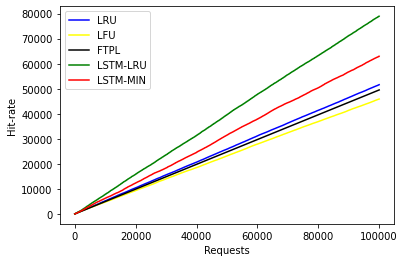

In [29]:
plt.plot(hit_LRU_test,'blue',label = 'LRU')
plt.plot(hit_LFU_test,'yellow',label = 'LFU')
plt.plot(hit_FTPL_test,'black',label = 'FTPL')
plt.plot(hit_LSTM_LRU_test,'green',label = 'LSTM-LRU')
plt.plot(hit_LSTM_min_test,'red',label = 'LSTM-MIN')
plt.legend()
plt.xlabel('Requests')
plt.ylabel('Hit-rate')
#plt.savefig('hit-rate_test')

Text(0, 0.5, 'Miss-rate')

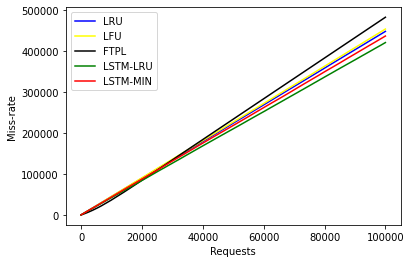

In [40]:
plt.plot(miss_LRU_test,'blue',label = 'LRU')
plt.plot(miss_LFU_test,'yellow',label = 'LFU')
plt.plot(miss_FTPL_test1,'black',label = 'FTPL')
plt.plot(miss_LSTM_LRU_test,'green',label = 'LSTM-LRU')
plt.plot(miss_LSTM_min_test,'red',label = 'LSTM-MIN')
plt.legend()
plt.xlabel('Requests')
plt.ylabel('Miss-rate')
#plt.savefig('miss-rate_test')